# Assessing models based on their complexity

In this notebook We will compare regression models with different complexity in order to assess which model fits best.


In [1]:
import turicreate

In [2]:
tmp = turicreate.SArray([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
price = turicreate.SArray([23,45,10])
print(tmp)
print(tmp_cubed)

[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


In [3]:
ex_sframe = turicreate.SFrame()
ex_sframe['power_1'] = tmp
print(ex_sframe)

+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



# Polynomial_sframe function

In [4]:
def polynomial_sframe(feature, degree ,target):
    poly_sframe = turicreate.SFrame()
    poly_sframe['power_1'] = feature
    poly_sframe['price'] = target
    if degree > 1:
        for power in range(2, degree+1): 
            name = 'power_' + str(power)
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x : x**power)

    return poly_sframe

In [5]:
print(polynomial_sframe(tmp, 3,price))

+---------+-------+---------+---------+
| power_1 | price | power_2 | power_3 |
+---------+-------+---------+---------+
|   1.0   |   23  |   1.0   |   1.0   |
|   2.0   |   45  |   4.0   |   8.0   |
|   3.0   |   10  |   9.0   |   27.0  |
+---------+-------+---------+---------+
[3 rows x 4 columns]



# Visualizing polynomial regression

In [6]:
sales = turicreate.SFrame('../data/home_data.sframe/')

In [7]:
sales = sales.sort(['sqft_living', 'price'])

In [8]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1,sales['price'])


In [9]:
model1 = turicreate.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.033269     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [10]:

model1.coefficients

name,index,value,stderr
(intercept),None,-43579.08525145298,4402.689697427734
power_1,None,280.62277088584864,1.9363985551321306


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

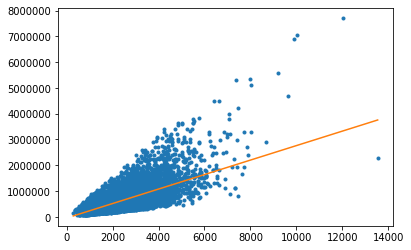

In [12]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data),'-')

In [13]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2 , sales['price'])

#getting the name of the feature
my_features = poly2_data.column_names()
my_features.remove('price')
print(my_features)

#creating a model with polynomial degree 2
model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

['power_1', 'power_2']


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.032907     | 5913020.984255     | 250948.368758                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [14]:
model2.coefficients

name,index,value,stderr
(intercept),None,199222.4964446181,7058.004835516453
power_1,None,67.99406406774024,5.28787201316191
power_2,None,0.03858123127891538,0.0008982465470323662


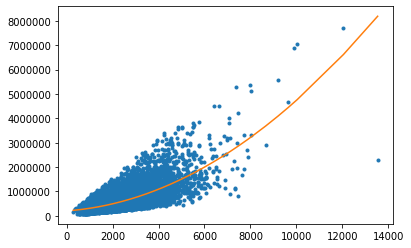

In [15]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [16]:
poly_3 = polynomial_sframe(sales['sqft_living'] , 3, sales["price"])
features3 = poly_3.column_names()
features3.remove('price')
print(features3)

#creating model with polynomial degree 3
model3 = turicreate.linear_regression.create(poly_3, target = "price", features = features3, validation_set=None)


['power_1', 'power_2', 'power_3']


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.045510     | 3261066.736007     | 249261.286346                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

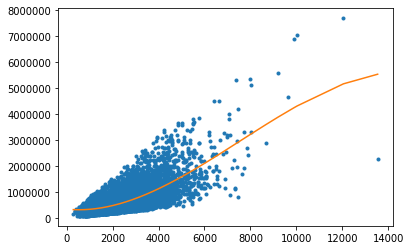

In [17]:
plt.plot(
    #first scatter plot
    poly_3["power_1"],poly_3["price"],".",
    
    #Best fit curve plotting
    poly_3["power_1"],model3.predict(poly_3),"-"
)

Now try a 15th degree polynomial:

In [18]:
poly_15 = polynomial_sframe(sales['sqft_living'] , 15, sales["price"])
features15 = poly_15.column_names()
features15.remove('price')
print(features15)

#creating model with polynomial degree 3
model15 = turicreate.linear_regression.create(poly_15, target = "price", features = features15, validation_set=None)


['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.069840     | 2662308.584339     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

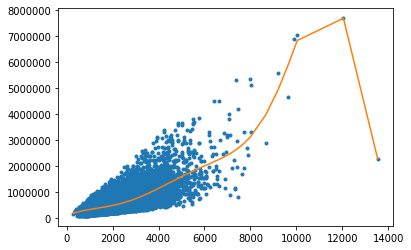

In [19]:
plt.plot(
    #first scatter plot
    poly_15["power_1"],poly_15["price"],".",
    
    #Best fit curve plotting
    poly_15["power_1"],model15.predict(poly_15),"-"
)

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

In [20]:
super_set_1, super_set_2 = sales.random_split(0.5, seed=0)
set_1, set_2 = super_set_1.random_split(0.5, seed=0)
set_3, set_4 = super_set_2.random_split(0.5, seed=0)

In [21]:
poly_set1 = polynomial_sframe(set_1['sqft_living'] , 15, set_1["price"])
features15 = poly_set1.column_names()
features15.remove('price')
print(features15)

#creating model with polynomial degree 3
model_set1 = turicreate.linear_regression.create(poly_set1, target = "price", features = features15, validation_set=None)
print(model_set1.coefficients)

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.024513     | 2195218.932304     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    223312.75025024067   |   830108.9460532968    |
|   power_1   |  None |    118.08612758501867   |   3476.5003169541187   |
|   power_2   |  None |   -0.04734820113328519  |   5.899909585600052    |
|   power_3   |  None |  3.2531034246807556e-05 |  0.00528964531842982   |
|   power_4   |  None |  -3.323721525696068e-09 | 2.7137081037783735e-06 |
|   power_5   |  None |  -9.758304575431146e-14 | 7.850089643626329e-10  |
|   power_6   |  None |  1.154403034071346e-17  | 1.1639977877832447e-13 |
|   power_7   |  None |  1.0514586941061925e-21 | 2.874483168861535e-17  |
|   power_8   |  None |  3.4604961638093926e-26 | 8.381898206315824e-21  |
|   power_9   |  None | -1.0965445390702074e-30 | 1.1755355288807577e-24 |
+-------------+-------+--

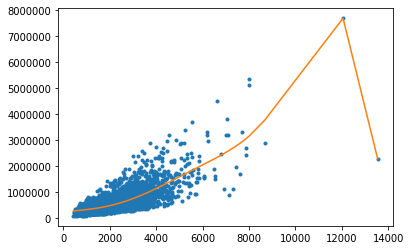

In [22]:
plt.plot(
    #first scatter plot
    poly_set1["power_1"],poly_set1["price"],".",
    
    #Best fit curve plotting
    poly_set1["power_1"],model_set1.predict(poly_set1),"-"
)

In [23]:
poly_set2 = polynomial_sframe(set_2['sqft_living'] , 15, set_2["price"])
features15 = poly_set2.column_names()
features15.remove('price')
print(features15)

#creating model with polynomial degree 3
model_set2 = turicreate.linear_regression.create(poly_set2, target = "price", features = features15, validation_set=None)
print(model_set2.coefficients)

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.024937     | 2069212.978547     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    89836.50774069817    |   1485684.1153183314   |
|   power_1   |  None |    319.8069467450623    |    8302.01699627468    |
|   power_2   |  None |   -0.10331539702552242  |   19.542968102396706   |
|   power_3   |  None |  1.0668247601071418e-05 |  0.025602889906960538  |
|   power_4   |  None |  5.7557709779285235e-09 | 2.0769332031382224e-05 |
|   power_5   |  None | -2.5466346471266904e-13 | 1.0940372359192355e-08 |
|   power_6   |  None | -1.0964134507841345e-16 | 3.792811720104769e-12  |
|   power_7   |  None | -6.3645844161977996e-21 | 8.555574569253323e-16  |
|   power_8   |  None |   5.52560416948073e-25  | 1.2859025646260514e-19 |
|   power_9   |  None |  1.3508203896164008e-28 | 1.850985682341971e-23  |
+-------------+-------+--

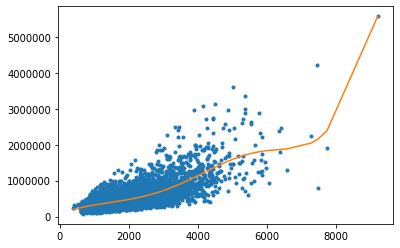

In [24]:
plt.plot(
    #first scatter plot
    poly_set2["power_1"],poly_set2["price"],".",
    
    #Best fit curve plotting
    poly_set2["power_1"],model_set2.predict(poly_set2),"-"
)

In [25]:
poly_set3 = polynomial_sframe(set_3['sqft_living'] , 15, set_3["price"])
features15 = poly_set3.column_names()
features15.remove('price')
print(features15)

#creating model with polynomial degree 3
model_set3 = turicreate.linear_regression.create(poly_set3, target = "price", features = features15, validation_set=None)
print(model_set3.coefficients)

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.054393     | 2269769.506522     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    87317.97955804528    |   2553003.4335862007   |
|   power_1   |  None |    356.30491103764274   |   13651.012110068792   |
|   power_2   |  None |   -0.16481744280273586  |   30.399375968731086   |
|   power_3   |  None |  4.404249926752384e-05  |   0.0373205098680601   |
|   power_4   |  None |   6.48234876409819e-10  | 2.8132512841675242e-05 |
|   power_5   |  None |  -6.752532265686709e-13 | 1.3661393367645473e-08 |
|   power_6   |  None | -3.3684259268232893e-17 | 4.319871880572198e-12  |
|   power_7   |  None |  3.609997042357059e-21  | 8.586577521200054e-16  |
|   power_8   |  None |  6.4699972552415375e-25 | 9.055605256734237e-20  |
|   power_9   |  None |  4.2363938891479043e-29 |          nan           |
+-------------+-------+--

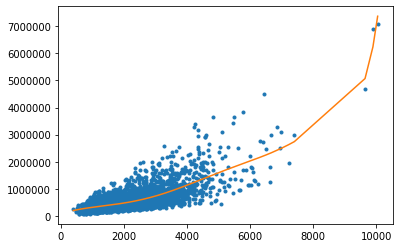

In [26]:
plt.plot(
    #first scatter plot
    poly_set3["power_1"],poly_set3["price"],".",
    
    #Best fit curve plotting
    poly_set3["power_1"],model_set3.predict(poly_set3),"-"
)

In [27]:
poly_set4 = polynomial_sframe(set_4['sqft_living'] , 15, set_4["price"])
features15 = poly_set4.column_names()
features15.remove('price')
print(features15)

#creating model with polynomial degree 3
model_set4 = turicreate.linear_regression.create(poly_set4, target = "price", features = features15, validation_set=None)
print(model_set4.coefficients)

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.035864     | 2314893.173832     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    259020.87943924987   |   1332477.8202677097   |
|   power_1   |  None |   -31.727716170976077   |    8314.07266417908    |
|   power_2   |  None |   0.10970276958898084   |   21.646692079098056   |
|   power_3   |  None |  -1.583838472539176e-05 |  0.03106947233257007   |
|   power_4   |  None | -4.4766062372868035e-09 | 2.7357294341718756e-05 |
|   power_5   |  None |  1.139765734292659e-12  | 1.542887058397474e-08  |
|   power_6   |  None |  1.9766912054732567e-16 |  5.51944707205955e-12  |
|   power_7   |  None |  -6.157836769153566e-21 | 1.0652335414228845e-15 |
|   power_8   |  None |  -4.880123041439314e-24 |          nan           |
|   power_9   |  None |  -6.621867814077207e-28 |          nan           |
+-------------+-------+--

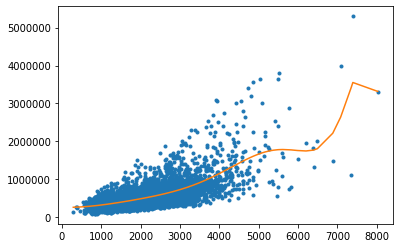

In [28]:
plt.plot(
    #first scatter plot
    poly_set4["power_1"],poly_set4["price"],".",
    
    #Best fit curve plotting
    poly_set4["power_1"],model_set4.predict(poly_set4),"-"
)

# Selecting a Polynomial Degree

In [29]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3980300371,2014-09-26 00:00:00+00:00,142000.0,0.0,0.0,290.0,20875.0,1.0,0
2856101479,2014-07-01 00:00:00+00:00,276000.0,1.0,0.75,370.0,1801.0,1.0,0
1723049033,2014-06-20 00:00:00+00:00,245000.0,1.0,0.75,380.0,15000.0,1.0,0
1222029077,2014-10-29 00:00:00+00:00,265000.0,0.0,0.75,384.0,213444.0,1.0,0
6896300380,2014-10-02 00:00:00+00:00,228000.0,0.0,1.0,390.0,5900.0,1.0,0
9266700190,2015-05-11 00:00:00+00:00,245000.0,1.0,1.0,390.0,2000.0,1.0,0
6303400395,2015-01-30 00:00:00+00:00,325000.0,1.0,0.75,410.0,8636.0,1.0,0
4322200105,2015-03-31 00:00:00+00:00,229050.0,1.0,1.0,420.0,3298.0,1.0,0
7549801385,2014-06-12 00:00:00+00:00,280000.0,1.0,0.75,420.0,6720.0,1.0,0
8658300340,2014-05-23 00:00:00+00:00,80000.0,1.0,0.75,430.0,5050.0,1.0,0


In [30]:
training_and_validation_data , test_data = sales.random_split(0.9,seed=1)
training_data , validation_data = training_and_validation_data.random_split(0.5 , seed=1)

In [31]:
import math
def compute_rss(actual_value , predicted_value):
    rss = 0
    for value in range(len(actual_value)):
        rss = rss + math.pow(actual_value[value]-predicted_value[value],2)
    return rss

for degree in range(1,16):
    reel_model_data = polynomial_sframe(training_data['sqft_living'],degree,training_data['price'])
    features = reel_model_data.column_names()
    features.remove("price")
    reel_model = turicreate.linear_regression.create(reel_model_data, target="price", features=features, verbose=False)
    predicted_output = reel_model.predict(validation_data)
    rss = compute_rss(validation_data['price'],predicted_output)
    print(f"The RSS of validation data with degree : {degree} : {rss}")
    
    
    

The RSS of validation data with degree : 1 : 1327988257928164.2
The RSS of validation data with degree : 2 : 1327984778162070.5
The RSS of validation data with degree : 3 : 1327987708064153.8
The RSS of validation data with degree : 4 : 1327991778971014.2
The RSS of validation data with degree : 5 : 1327986377195274.2
The RSS of validation data with degree : 6 : 1327984904278840.2
The RSS of validation data with degree : 7 : 1327984754173420.5
The RSS of validation data with degree : 8 : 1327991714068974.0
The RSS of validation data with degree : 9 : 1327997860804426.8
The RSS of validation data with degree : 10 : 1327996840676320.0
The RSS of validation data with degree : 11 : 1327986038835889.8
The RSS of validation data with degree : 12 : 1327985838586856.5
The RSS of validation data with degree : 13 : 1327987042155829.8
The RSS of validation data with degree : 14 : 1327998442668260.0
The RSS of validation data with degree : 15 : 1327991441110082.0


In [34]:
#Computing RSS of test data
for degree in range(1,16):
    reel_model_data = polynomial_sframe(training_data['sqft_living'],degree,training_data['price'])
    features = reel_model_data.column_names()
    features.remove("price")
    reel_model = turicreate.linear_regression.create(reel_model_data, target="price", features=features, verbose=False)
    predicted_output = reel_model.predict(test_data)
    rss = compute_rss(test_data['price'],predicted_output)
    print(f"The RSS of Test data with degree : {degree} = {rss}")

The RSS of Test data with degree : 1 = 252878789883928.1
The RSS of Test data with degree : 2 = 252889619075835.62
The RSS of Test data with degree : 3 = 252920236493911.56
The RSS of Test data with degree : 4 = 252945730936284.97
The RSS of Test data with degree : 5 = 252870237098246.78
The RSS of Test data with degree : 6 = 252863559678253.78
The RSS of Test data with degree : 7 = 252866552870682.78
The RSS of Test data with degree : 8 = 252890311338977.3
The RSS of Test data with degree : 9 = 252895248038092.84
The RSS of Test data with degree : 10 = 252878510709801.84
The RSS of Test data with degree : 11 = 252957682256993.94
The RSS of Test data with degree : 12 = 252886861241718.25
The RSS of Test data with degree : 13 = 252871493077673.16
The RSS of Test data with degree : 14 = 252880631612636.72
The RSS of Test data with degree : 15 = 252877074486976.84
